In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("current.csv")
df.head()

,transaction_id,cc_number,user_id,credit_limit,amount,transaction_type,city,card_lat,card_lon,merchant_lat,merchant_lon,merchant_name,timestamp,hour_of_day,day_of_week,is_night,is_fraud
0,TXN00000000,4101****7091,USER20098,150000,7651.50,POS,Bangalore,12.9716,77.5946,12.982566,77.592268,Flipkart,2025-11-21 23:02:00.120564,23,4,1,0
1,TXN00000001,4377****7918,USER79746,100000,18000.53,ATM,Delhi,28.6139,77.2090,28.618014,77.240837,Swiggy,2025-11-19 20:42:00.950842,20,2,0,0
2,TXN00000002,4159****2412,USER30039,100000,45123.65,ATM,Mumbai,19.0760,72.8777,19.096139,72.855814,BPCL,2025-11-18 15:41:00.274578,15,1,0,0
3,TXN00000003,4106****7886,USER84918,50000,25860.33,ATM,Delhi,28.6139,77.2090,28.616520,77.217060,DMart,2025-11-24 11:08:00.484770,11,0,0,0
4,TXN00000004,4471****3446,USER28388,100000,10432.14,POS,Chennai,13.0827,80.2707,13.105489,80.278756,BPCL,2025-12-01 02:33:00.055314,2,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    100000 non-null  object 
 1   cc_number         100000 non-null  object 
 2   user_id           100000 non-null  object 
 3   credit_limit      100000 non-null  int64  
 4   amount            100000 non-null  float64
 5   transaction_type  100000 non-null  object 
 6   city              100000 non-null  object 
 7   card_lat          100000 non-null  float64
 8   card_lon          100000 non-null  float64
 9   merchant_lat      100000 non-null  float64
 10  merchant_lon      100000 non-null  float64
 11  merchant_name     100000 non-null  object 
 12  timestamp         100000 non-null  object 
 13  hour_of_day       100000 non-null  int64  
 14  day_of_week       100000 non-null  int64  
 15  is_night          100000 non-null  int64  
 16  is_fraud          100

In [5]:
df['is_fraud'].value_counts()

is_fraud
0    86544
1    13456
Name: count, dtype: int64

In [7]:
df['cc_number'].value_counts()

cc_number
4733****6159    39
4154****5674    37
4322****7807    36
4932****8439    36
4967****3044    36
                ..
4557****1601     8
4698****5667     8
4253****2483     8
4661****3828     7
4731****2149     4
Name: count, Length: 4999, dtype: int64

Total rows: 100000
Total columns: 17

First 5 rows:
  transaction_id     cc_number    user_id  credit_limit    amount  \
0    TXN00000000  4101****7091  USER20098        150000   7651.50   
1    TXN00000001  4377****7918  USER79746        100000  18000.53   
2    TXN00000002  4159****2412  USER30039        100000  45123.65   
3    TXN00000003  4106****7886  USER84918         50000  25860.33   
4    TXN00000004  4471****3446  USER28388        100000  10432.14   

  transaction_type       city  card_lat  card_lon  merchant_lat  merchant_lon  \
0              POS  Bangalore   12.9716   77.5946     12.982566     77.592268   
1              ATM      Delhi   28.6139   77.2090     28.618014     77.240837   
2              ATM     Mumbai   19.0760   72.8777     19.096139     72.855814   
3              ATM      Delhi   28.6139   77.2090     28.616520     77.217060   
4              POS    Chennai   13.0827   80.2707     13.105489     80.278756   

  merchant_name                   timestamp  h

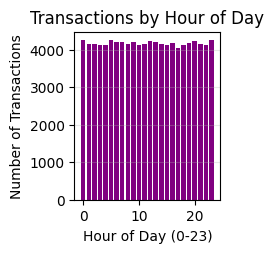

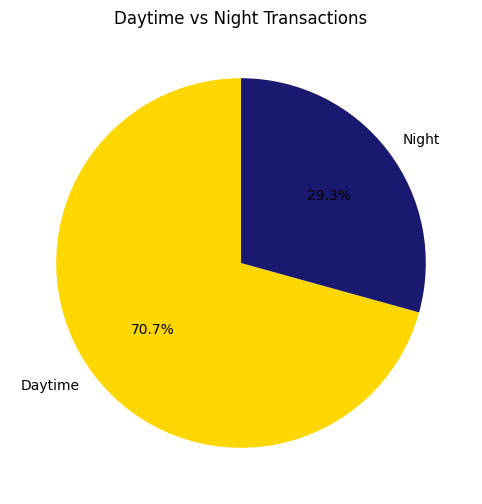


=== FRAUD ANALYSIS ===
Legitimate transactions: 86544
Fraudulent transactions: 13456


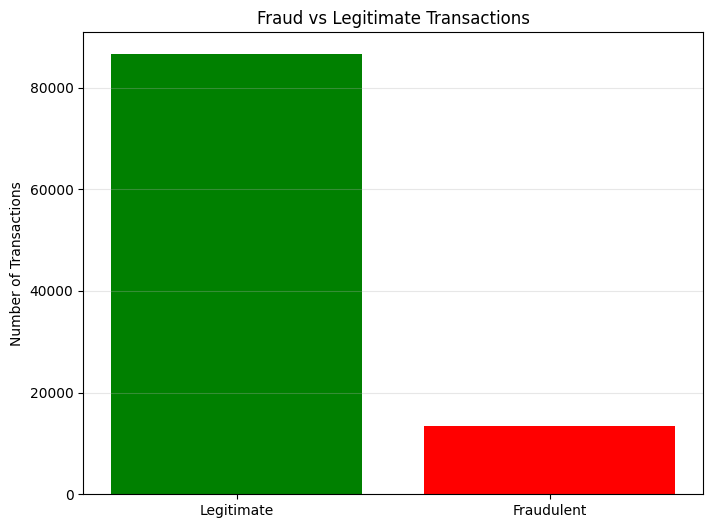


WEEK 1 EDA COMPLETED!
Next step: Train baseline models (Isolation Forest, One-Class SVM)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




data = pd.read_csv('current.csv')


print(f"Total rows: {len(data)}")
print(f"Total columns: {len(data.columns)}")
print("\nFirst 5 rows:")
print(data.head())




print("\nColumn names:")
for i, col in enumerate(data.columns, 1):
    print(f"{i}. {col}")

print("\nData types:")
print(data.dtypes)

print("\nMissing values per column:")
print(data.isnull().sum())


plt.subplot(2, 3, 4)
if 'hour_of_day' in data.columns:
    hour_counts = data['hour_of_day'].value_counts().sort_index()
    plt.bar(hour_counts.index, hour_counts.values, color='purple')
    plt.xlabel('Hour of Day (0-23)')
    plt.ylabel('Number of Transactions')
    plt.title('Transactions by Hour of Day')
    plt.grid(True, alpha=0.3, axis='y')



if 'is_night' in data.columns:
    print("\n=== NIGHT TRANSACTIONS ANALYSIS ===")
    night_counts = data['is_night'].value_counts()
    print(f"Daytime transactions: {night_counts.get(0, 0)}")
    print(f"Night transactions: {night_counts.get(1, 0)}")
    
    # Create pie chart for day/night transactions
    plt.figure(figsize=(8, 6))
    colors = ['gold', 'midnightblue']
    plt.pie([night_counts.get(0, 0), night_counts.get(1, 0)], 
            labels=['Daytime', 'Night'], 
            colors=colors, 
            autopct='%1.1f%%', 
            startangle=90)
    plt.title('Daytime vs Night Transactions')
    plt.show()

# ============================================
# 10. FRAUD ANALYSIS (if fraud column exists)
# ============================================

if 'is_fraud' in data.columns:
    print("\n=== FRAUD ANALYSIS ===")
    fraud_counts = data['is_fraud'].value_counts()
    print(f"Legitimate transactions: {fraud_counts.get(0, 0)}")
    print(f"Fraudulent transactions: {fraud_counts.get(1, 0)}")
    
    # Create bar chart for fraud distribution
    plt.figure(figsize=(8, 6))
    plt.bar(['Legitimate', 'Fraudulent'], 
            [fraud_counts.get(0, 0), fraud_counts.get(1, 0)], 
            color=['green', 'red'])
    plt.ylabel('Number of Transactions')
    plt.title('Fraud vs Legitimate Transactions')
    plt.grid(True, alpha=0.3, axis='y')
    plt.show()

print("\n" + "="*50)
print("WEEK 1 EDA COMPLETED!")
print("Next step: Train baseline models (Isolation Forest, One-Class SVM)")
print("="*50)

In [9]:
print("\n=== TRANSACTION AMOUNT STATISTICS ===")
print(f"Average amount: ₹{data['amount'].mean():.2f}")
print(f"Maximum amount: ₹{data['amount'].max():.2f}")
print(f"Minimum amount: ₹{data['amount'].min():.2f}")
print(f"Median amount: ₹{data['amount'].median():.2f}")


=== TRANSACTION AMOUNT STATISTICS ===
Average amount: ₹40380.22
Maximum amount: ₹396539.59
Minimum amount: ₹100.01
Median amount: ₹28004.41


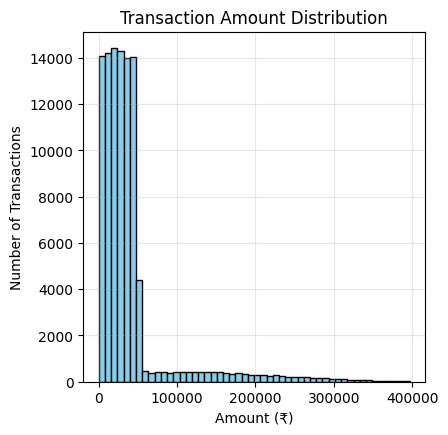

In [10]:
# Create figure for visualizations
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.hist(data['amount'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Amount (₹)')
plt.ylabel('Number of Transactions')
plt.title('Transaction Amount Distribution')
plt.grid(True, alpha=0.3)

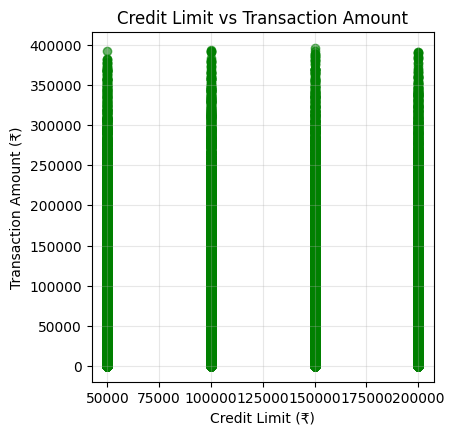

In [11]:
## creditelimit vs amount
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
plt.scatter(data['credit_limit'], data['amount'], alpha=0.6, color='green')
plt.xlabel('Credit Limit (₹)')
plt.ylabel('Transaction Amount (₹)')
plt.title('Credit Limit vs Transaction Amount')
plt.grid(True, alpha=0.3)